# HiDPy - Stage 3 : Comparison between average statistics of Subpopulations from different biological conditions

## About 

This is the third stage of the HidPy workflow. It loads the statitics from stage 2 for different conditions.

## 3.1 Import the relevant packages

_Note: Please do NOT edit this panel._ 

In [1]:
# Imports 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
import pickle
import os
import sys 

# Path hidpy
sys.path.append('%s/../' % os.getcwd())

## 3.2 Input panel 

The user must update these parameters to match the parameters in Stage 2 and input the folder path per condition to be analyzed.

In [2]:
# Read the data and define keylists for data frame
Pickles_Cond = {}

Pickles_Cond[0] = 'C:/Users/valad/Documents/GitHub/hidpy-haitham/data/U2OS_SiR_DNA_NoSerum/hidpy.output_28062023/Pickles/gmm_constrained_28062023/pickle/Statistics.pickle' 
Pickles_Cond[1] = 'C:/Users/valad/Documents/GitHub/hidpy-haitham/data/U2OS_SiR_DNA_Serum/hidpy.output_28062023/Pickles/gmm_constrained_28062023/pickle/Statistics.pickle'

# Names of conditions
ConditionsSTR = ['- Serum','+ Serum']

# Parameters that were deconvolved 
Paramdecon_keylist = ['D','A','V']

## 3.3 Reading statistical results per condition 

_Note: Please do NOT edit this panel._ 

In [3]:
data_dicts = {}
file_keylists = {}

# Reading dictionaries and files keylists

for condNum in range(len(Pickles_Cond)):
    data_dict = list()

    with open(Pickles_Cond[condNum],'rb') as f:
        data_dict = pickle.load(f)

    data_dicts[condNum] = data_dict
    file_keylists[condNum] =list(data_dict.keys())

## 3.4 Plotting comparison plots per biophysical parameter

_Note: Please do NOT edit this panel._ 

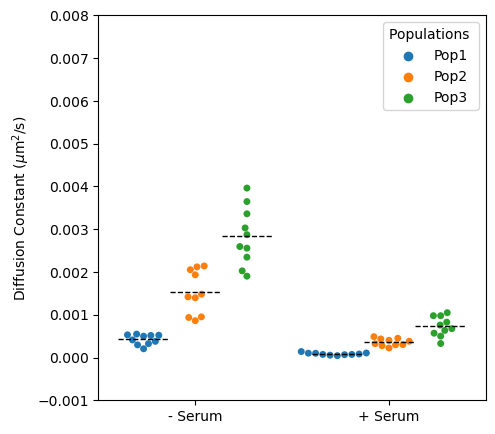

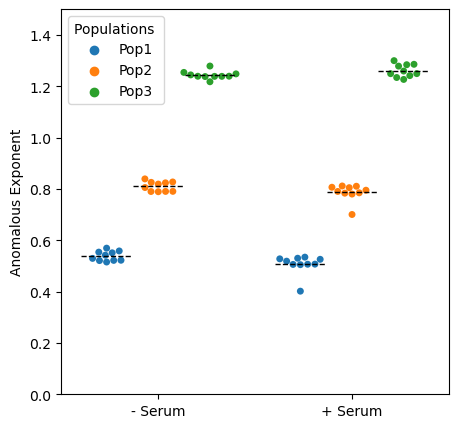

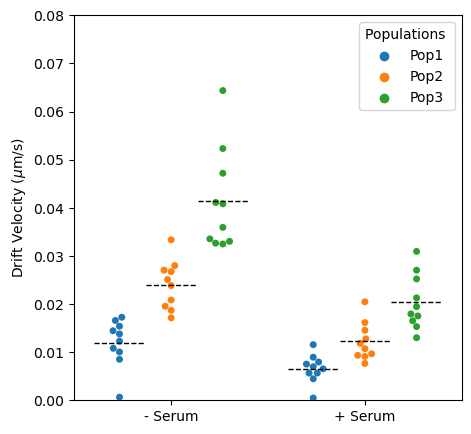

In [4]:
NumberConditions=len(file_keylists)

for i in range(len(Paramdecon_keylist)):
    df = list()
    matValues = list()

    for ii in range(NumberConditions):
        meanMat = list()
        meanMatarray = list()

        for j in range(len(file_keylists[ii])):
            mat_temp = np.array(data_dicts[ii][file_keylists[ii][j]][Paramdecon_keylist[i]])
            
            # Check if file is empty
            if mat_temp.size == 0:
                continue

            meanMat.append(mat_temp[0,:])
        meanMatarray = np.array(meanMat)

        for iii in range(meanMatarray.shape[0]):
            for jjj in range(meanMatarray.shape[1]):
                matValues.append([meanMatarray[iii, jjj], jjj, ii])
    
    
    df = pd.DataFrame(matValues, columns=['Values', 'Populations', 'Conditions'])

    # Define a mapping dictionary for replacement
    mapping = {iiii: f'Pop{iiii+1}' for iiii in range(len(df))}

    # Replace values in the 'Populations' column using the mapping dictionary
    df['Populations'] = df['Populations'].replace(mapping)

    #Plot the data using seaborn violinplot
    fig, axes = plt.subplots(figsize=(5,5))
    ax=sns.swarmplot(x='Conditions', y='Values', hue='Populations', data=df,ax = axes, dodge=True)
    sns.move_legend(ax, "upper left")

    # plot the mean line
    sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '--', 'lw': 1},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x='Conditions',
                y='Values',
                hue='Populations',
                data=df,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=ax)
    
    handles,labels=plt.gca().get_legend_handles_labels()

    plt.legend(handles[:3],labels[:3],title='Populations ')
    


    # Other option of plot
    # g = sns.catplot(data=df, x="Conditions", y="Values", kind="violin", hue='Populations',inner=None)
    # ga=sns.swarmplot(x='Conditions', y='Values', hue='Populations', palette='dark:k', data=df,ax = g.ax, dodge=True, size=3,legend=False)
    
 
    # Set axis labels
    plt.xlabel('')
    plt.xticks([0,1],ConditionsSTR)
    #plt.ylabel(Paramdecon_keylist[i])

    if i==0:
        plt.ylim(-1e-3,8e-3)
        plt.ylabel(r'Diffusion Constant ($\mu$m$^2$/s)')
    elif i==1:
        plt.ylim(0,1.5)
        plt.ylabel('Anomalous Exponent')
    else:
        plt.ylim(0,0.08)
        plt.ylabel(r'Drift Velocity ($\mu$m/s)')


    # Show the plot
    plt.show()